In [1]:
%matplotlib notebook

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


def onclick(event):
    """
    Fonction permettant de positionner les interfaces du capillaire avec un clic de la souris
    :param event:
    :return:
    """
    tx = 'coord: x=%.2f, y=%.2f' % (event.xdata, event.ydata)
    text.set_text(tx)
    coords.append([event.xdata, event.ydata])

def geo_masque(coords):
    # Entrée des coordonnées des parois
    # Image 0 degrés
    # Paroi intérieure supérieure
    x_0_sup = coords[0][0]
    z_0_sup = coords[0][1] 
        # Paroi intérieure inférieure
    x_0_inf = coords[1][0]
    z_0_inf = coords[1][1]

    centre = [(x_0_sup+x_0_inf)/2, (z_0_sup+z_0_inf)/2]
    rayon_int = np.abs((x_0_sup-x_0_inf)/2)
    return centre, rayon_int

Le format de l'image est (x:512, y:512, z:576)


<IPython.core.display.Javascript object>


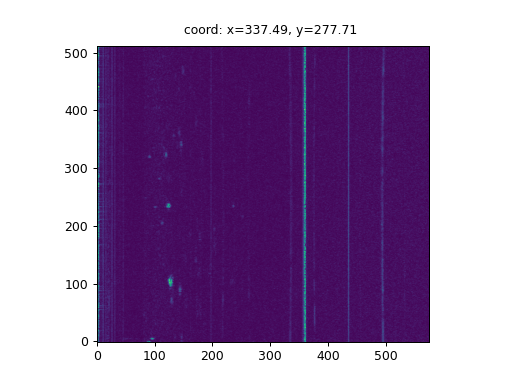

In [2]:
# get image (z: axe de propagation laser, y: axe de rotation capillaire, x: axe perpendiculaire
# a la rotation capillaire)
path_image = "data/data_test_oct_billes_0_degree.nii"
image = nib.load(path_image)
# extraire le format de l'image
nx, ny, nz = image.shape
print("Le format de l'image est (x:{}, y:{}, z:{})".format(nx, ny, nz))
# extraire un b_scan avec plan 'zy'
data = image.get_fdata()
x_tube = 310
b_scan = data[:, x_tube, :]

global coords
coords = []
    
fig = plt.figure("cliquer sur les parois sup puis inf et fermer")
ax = fig.add_subplot(111)
ax.imshow(b_scan, origin="lower")
text = ax.text(150,550, "", va="top", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [3]:
centre, rayon_int = geo_masque(coords)

<IPython.core.display.Javascript object>


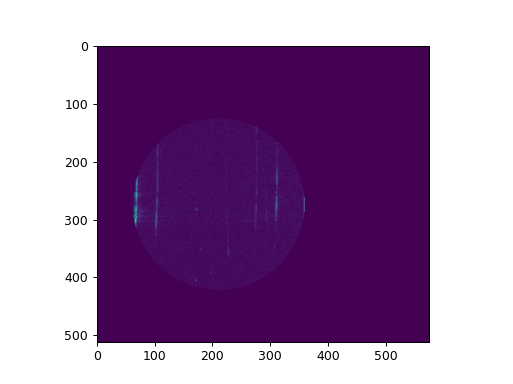

In [4]:
# vecteur des coordonnées sur l'axe z (nombre de colonne)
z = np.linspace(0, nz, nz)
# vecteur des coordonnées sur l'axe y (nombre de ligne)
y = np.linspace(0, ny, ny)
# par defaut meshgrid utilise un indexage cartésien
zv, yv = np.meshgrid(z, y, sparse=False, indexing='xy')
# creation carte distance du centre
dist_du_centre = np.sqrt((zv - centre[0])**2 + (yv - centre[1])**2)
# masque de l'intérieur du tube capillaire
masque_capillaire_int = dist_du_centre <= rayon_int
# initialisation de la carte d'indice de refraction indexage 'ij'
masque = np.zeros([ny, nz])
masque[masque_capillaire_int] = 1

b_scan_seg = b_scan * masque 

plt.imshow(b_scan_seg)
plt.show()

Le format de l'image est (x:512, y:512, z:576)


<IPython.core.display.Javascript object>


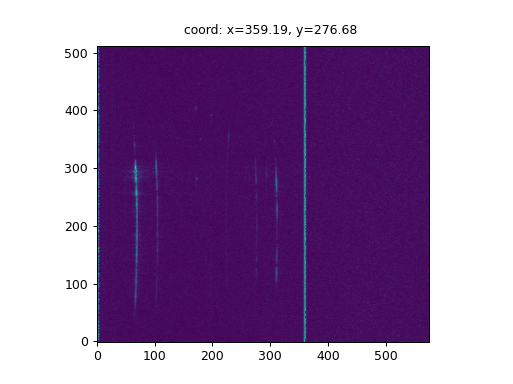

In [5]:
# get image (z: axe de propagation laser, y: axe de rotation capillaire, x: axe perpendiculaire
# a la rotation capillaire)
path_image = "data/data_test_oct_1degree.nii"
image = nib.load(path_image)
# extraire le format de l'image
nx, ny, nz = image.shape
print("Le format de l'image est (x:{}, y:{}, z:{})".format(nx, ny, nz))
# extraire un b_scan avec plan 'zy'
data = image.get_fdata()
x_tube = 310
b_scan = data[:, x_tube, :]

global coords
coords = []
    
fig = plt.figure("cliquer sur les parois sup puis inf et fermer")
ax = fig.add_subplot(111)
ax.imshow(b_scan, origin="lower")
text = ax.text(150,550, "", va="top", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [6]:
centre, rayon_int = geo_masque(coords)

In [9]:
# vecteur des coordonnées sur l'axe z (nombre de colonne)
z = np.linspace(0, nz, nz)
# vecteur des coordonnées sur l'axe y (nombre de ligne)
y = np.linspace(0, ny, ny)
# par defaut meshgrid utilise un indexage cartésien
zv, yv = np.meshgrid(z, y, sparse=False, indexing='xy')
# creation carte distance du centre
dist_du_centre = np.sqrt((zv - centre[0])**2 + (yv - centre[1])**2)
# masque de l'intérieur du tube capillaire
masque_capillaire_int = dist_du_centre <= rayon_int
# initialisation de la carte d'indice de refraction indexage 'ij'
masque = np.zeros([ny, nz])
masque[masque_capillaire_int] = 1

b_scan_seg_test = b_scan * masque 

plt.imshow(b_scan_seg_test)
plt.show()

In [8]:
p_signal = sum(sum(b_scan_seg**2))
print(p_signal)
p_bruit = sum(sum((b_scan_seg - b_scan_seg_test)**2))
print(p_bruit)

SNR = 10 * np.log(p_signal/p_bruit)
print(SNR)

360269957877.0
705075411995.0
-6.7145113104041005
